# Лабораторная работа №2

Численная реализация оптического преобразования Фурье на основе быстрого преобразования Фурье.

> Вариант 7

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
import sympy

%matplotlib inline

In [2]:
def versions():
    from datetime import datetime
    print("Notebook date:", datetime.now())

    import numpy as np
    print("NumPy:", np.__version__)

    import scipy as sc
    print("SciPy:", sc.__version__)

    import sys
    print("Python:", sys.version)

versions()

Notebook date: 2020-04-30 00:30:21.942609
NumPy: 1.18.1
SciPy: 1.4.1
Python: 3.7.7 (tags/v3.7.7:d7c567b08f, Mar 10 2020, 10:41:24) [MSC v.1900 64 bit (AMD64)]


In [3]:
a = 5
N = 128
M = 2048

### 1. Реализация финитного преобразования с помощью БПФ

In [4]:
def finite_fft(vector_f, a, b, N, M):
    # 1. Append zeroes vectors to M size.
    zeros = np.zeros(int((M - N) / 2))

    vector_f = np.concatenate((zeros, vector_f, zeros), axis=None)

    # 2. Swap parts of vector f.
    center = int(len(vector_f) / 2)

    vector_f = np.concatenate((vector_f[center:], vector_f[:center]))

    # 3. Apply FFT.
    vector_F = np.fft.fft(vector_f, M) * (b - a) / (N - 1)

    # 4. Swap parts of vector F.
    center = int(len(vector_F) / 2)

    vector_F = np.concatenate((vector_F[center:], vector_F[:center]))

    # 5. Cut center.
    vector_F = vector_F[int((M - N) / 2) : int((M - N) / 2 + N)]

    # 6. Recount domain of a function.
    _new_domain = N ** 2 / (4 * a * M)
    func_domain = sorted([-_new_domain, _new_domain])

    return vector_F, func_domain

### 2. Гауссов пучок

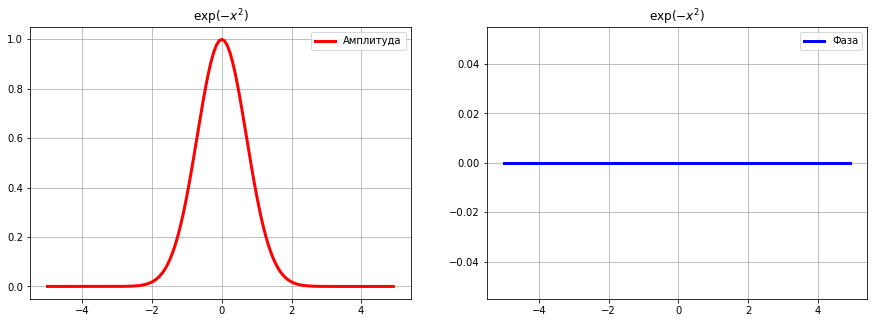

In [5]:
def gen_gaussian_beam(x):
    return np.exp(-(x ** 2))


lspace = np.linspace(-a, a, num=N, endpoint=False)
gaussian_beam = gen_gaussian_beam(lspace)

_, arr = plt.subplots(1, 2, figsize=(15, 5))

arr[0].plot(lspace, np.absolute(gaussian_beam), color="r", linewidth=3.0, label="Амплитуда")
arr[0].set_title(r"$\exp(-x^2)$")
arr[0].legend()
arr[0].grid()

arr[1].plot(lspace, np.angle(gaussian_beam), color="b", linewidth=3.0, label="Фаза")
arr[1].set_title(r"$\exp(-x^2)$")
arr[1].legend()
arr[1].grid()

plt.show()

### 3. Правильность реализации финитного преобразования с помощью БПФ

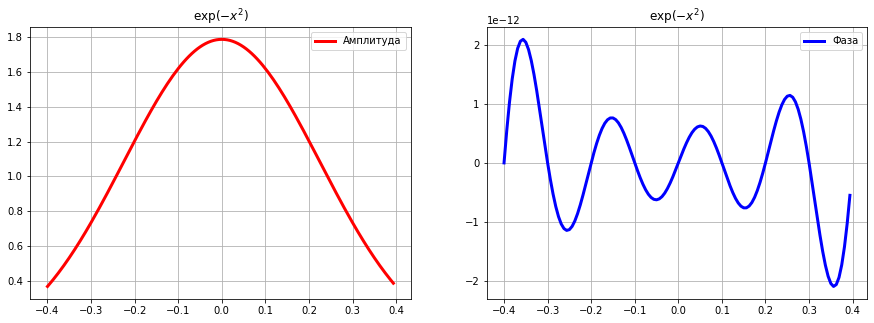

In [6]:
fft_gaussian_beam, domain = finite_fft(
    gen_gaussian_beam(np.linspace(-a, a, num=N, endpoint=False)), a=-a, b=a, N=N, M=M
)

lspace = np.linspace(domain[0], domain[1], num=N, endpoint=False)

_, arr = plt.subplots(1, 2, figsize=(15, 5))

arr[0].plot(
    lspace, np.absolute(fft_gaussian_beam), color="r", linewidth=3.0, label="Амплитуда",
)
arr[0].set_title(r"$\exp(-x^2)$")
arr[0].legend()
arr[0].grid()

arr[1].plot(lspace, np.angle(fft_gaussian_beam), color="b", linewidth=3.0, label="Фаза")
arr[1].set_title(r"$\exp(-x^2)$")
arr[1].legend()
arr[1].grid()

plt.show()

### 4. Реализация финитного преобразования с помощью численного метода

In [7]:
def quad(func, a, b, N):
    h = (b - a) / N

    return ((func(a) + func(b)) / 2 + sum([func(a + h * i) for i in range(N)])) * h


def numerical(func, a, b, N, M):
    # Create new function domain.
    _new_domain = N ** 2 / (4 * a * M)
    func_domain = sorted([-_new_domain, _new_domain])

    # Step for function.
    func_step = (func_domain[1] - func_domain[0]) / (N - 1)

    F = np.zeros((N,), dtype=np.complex)

    for i in range(len(F)):
        u = func_domain[0] + i * func_step

        F[i] = quad(lambda x: func(x) * np.exp(-2 * np.pi * u * x * 1j), a=a, b=b, N=N)

    return F, func_domain

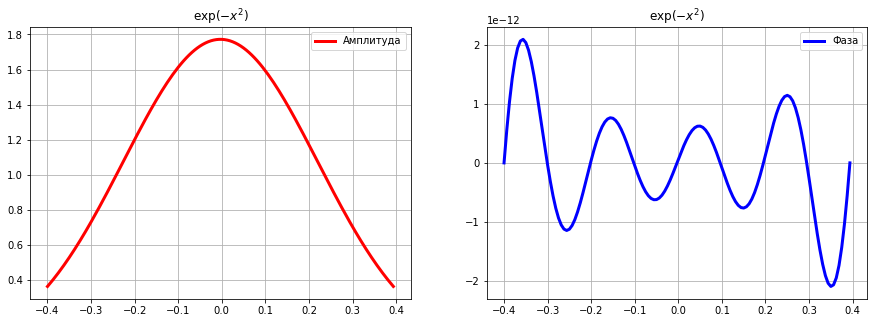

In [8]:
numerical_gaussian_beam, domain = numerical(gen_gaussian_beam, a=-a, b=a, N=N, M=M)

lspace = np.linspace(domain[0], domain[1], num=N, endpoint=False)

_, arr = plt.subplots(1, 2, figsize=(15, 5))

arr[0].plot(lspace, np.absolute(numerical_gaussian_beam), color="r", linewidth=3.0, label="Амплитуда")
arr[0].set_title(r"$\exp(-x^2)$")
arr[0].legend()
arr[0].grid()

arr[1].plot(lspace, np.angle(numerical_gaussian_beam), color="b", linewidth=3.0, label="Фаза")
arr[1].set_title(r"$\exp(-x^2)$")
arr[1].legend()
arr[1].grid()

plt.show()

### 5. Результаты двух разных реализаций преобразования

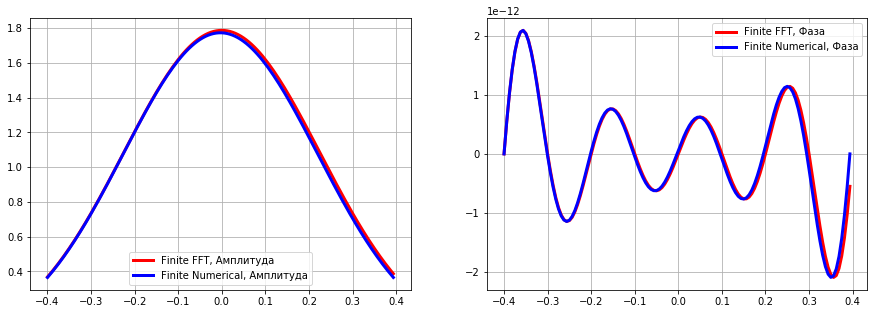

In [9]:
_, arr = plt.subplots(1, 2, figsize=(15, 5))

arr[0].plot(lspace, np.absolute(fft_gaussian_beam), color="r", linewidth=3.0, label="Finite FFT, Амплитуда")
arr[0].plot(lspace, np.absolute(numerical_gaussian_beam), color="b", linewidth=3.0, label="Finite Numerical, Амплитуда")
arr[0].grid()
arr[0].legend()

arr[1].plot(lspace, np.angle(fft_gaussian_beam), color="r", linewidth=3.0, label="Finite FFT, Фаза")
arr[1].plot(lspace, np.angle(numerical_gaussian_beam), color="b", linewidth=3.0, label="Finite Numerical, Фаза")
arr[1].grid()
arr[1].legend()

plt.show()

### 6. Световое поле

#### Исходное поле

Вариант 7: $x^2$

In [10]:
def gen_light_field(x):
    return x ** 2

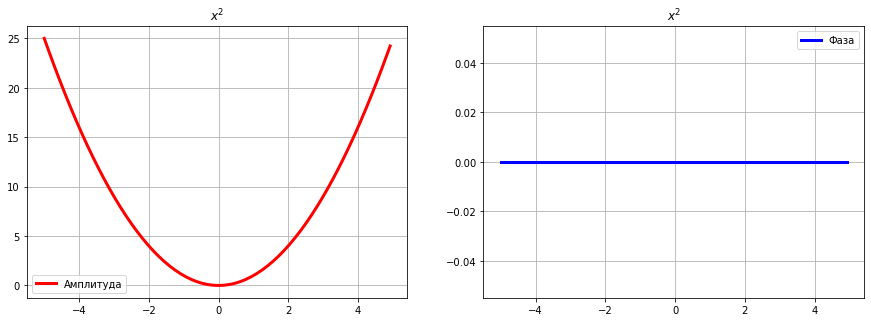

In [11]:
lspace = np.linspace(-a, a, num=N, endpoint=False)
light_field = gen_light_field(lspace)

_, arr = plt.subplots(1, 2, figsize=(15, 5))

arr[0].plot(lspace, np.absolute(light_field), color="r", linewidth=3.0, label="Амплитуда")
arr[0].set_title(r"$x^2$")
arr[0].legend()
arr[0].grid()

arr[1].plot(lspace, np.angle(light_field), color="b", linewidth=3.0, label="Фаза")
arr[1].set_title(r"$x^2$")
arr[1].legend()
arr[1].grid()

plt.show()

#### Преобразование

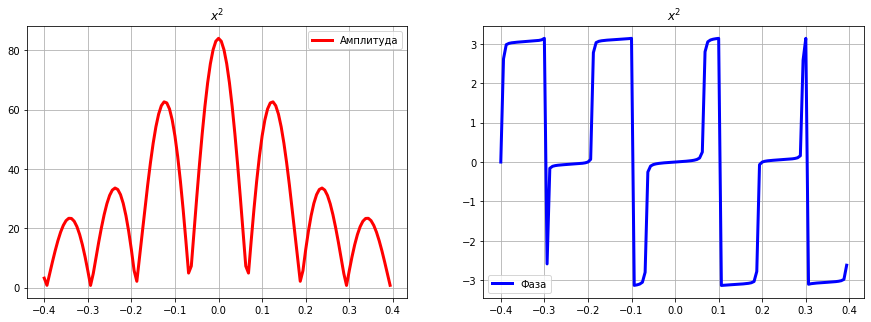

In [12]:
fft_light_field, domain = finite_fft(gen_light_field(np.linspace(-a, a, num=N, endpoint=False)), a=-a, b=a, N=N, M=M)

lspace = np.linspace(domain[0], domain[1], num=N, endpoint=False)

_, arr = plt.subplots(1, 2, figsize=(15, 5))

arr[0].plot(lspace, np.absolute(fft_light_field), color="r", linewidth=3.0, label="Амплитуда")
arr[0].set_title(r"$x^2$")
arr[0].legend()
arr[0].grid()

arr[1].plot(lspace, np.angle(fft_light_field), color="b", linewidth=3.0, label="Фаза")
arr[1].set_title(r"$x^2$")
arr[1].legend()
arr[1].grid()

plt.show()

### 7. Аналитический результат преобразования

In [13]:
_x = sympy.Symbol("x")
_u = sympy.Symbol("u")
_a = sympy.Symbol("a")

integrate = sympy.integrate(
    gen_light_field(_x) * sympy.exp(-2 * sympy.pi * 1j * _u * _x),
    (_x, -_a, _a),
).simplify()

#### Аналитическое решение в общем виде

In [14]:
integrate

Piecewise(((0.5*I*pi**2*a**2*u**2 + 0.5*pi*a*u + (-0.5*I*pi**2*a**2*u**2 + 0.5*pi*a*u + 0.25*I)*exp(4.0*I*pi*a*u) - 0.25*I)*exp(-2.0*I*pi*a*u)/(pi**3*u**3), (u > -oo) & (u < oo) & Ne(u, 0)), (2*a**3/3, True))

#### Аналитическое решение после подстановки $a$

In [15]:
integrate.subs(_a, a)

Piecewise(((12.5*I*pi**2*u**2 + 2.5*pi*u + (-12.5*I*pi**2*u**2 + 2.5*pi*u + 0.25*I)*exp(20.0*I*pi*u) - 0.25*I)*exp(-10.0*I*pi*u)/(pi**3*u**3), (u > -oo) & (u < oo) & Ne(u, 0)), (250/3, True))

In [16]:
analytical_function = sympy.lambdify(
    _u, integrate.subs(_a, a).args[0][0], "numpy"
)

#### Сравнение графиков

<string>:2: RuntimeWarning: invalid value encountered in true_divide


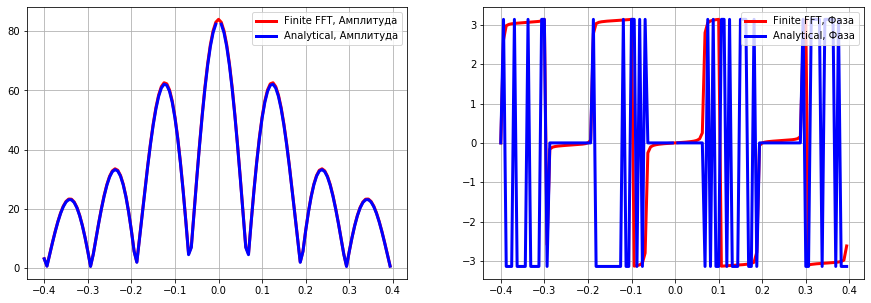

In [17]:
fft_light_field, domain = finite_fft(gen_light_field(np.linspace(-a, a, num=N, endpoint=False)), a=-a, b=a, N=N, M=M)

lspace = np.linspace(domain[0], domain[1], num=N, endpoint=False)

analytical_result = analytical_function(lspace)

_, arr = plt.subplots(1, 2, figsize=(15, 5))

arr[0].plot(lspace, np.absolute(fft_light_field), color="r", linewidth=3.0, label="Finite FFT, Амплитуда")
arr[0].plot(lspace, np.absolute(analytical_result), color="b", linewidth=3.0, label="Analytical, Амплитуда")
arr[0].grid()
arr[0].legend()

arr[1].plot(lspace, np.angle(fft_light_field), color="r", linewidth=3.0, label="Finite FFT, Фаза")
arr[1].plot(lspace, np.angle(analytical_result), color="b", linewidth=3.0, label="Analytical, Фаза")
arr[1].grid()
arr[1].legend()

plt.show()

# Двумерный случай

## 1. Гауссов пучок

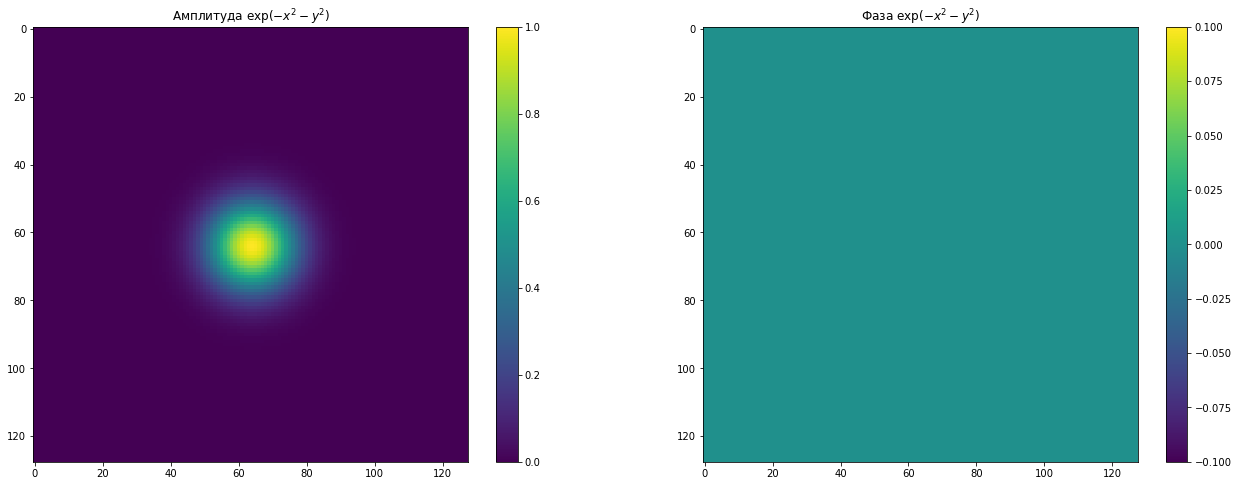

In [18]:
def gen_gaussian_beam_2d(x, y):
    return np.exp(-x ** 2 - y ** 2)

lspace = np.linspace(-a, a, num=N, endpoint=False)
X, Y = np.meshgrid(lspace, lspace)

gaussian_beam_2d = gen_gaussian_beam_2d(X, Y).astype(np.complex)

# - - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -

fig = plt.figure(figsize=(22, 8))

ax = fig.add_subplot(121)
plt.imshow(np.absolute(gaussian_beam_2d))
plt.title(r"Амплитуда $\exp(-x^2 -y^2)$")
plt.colorbar()

ax = fig.add_subplot(122)
plt.imshow(np.angle(gaussian_beam_2d))
plt.title(r"Фаза $\exp(-x^2 -y^2)$")
plt.colorbar()

plt.show()

## 2. Правильность реализации финитного преобразования с помощью БПФ

In [19]:
def finite_fft_2d(matrix, a, b, N, M):
    fft_gaussian_beam_2d = matrix.copy()

    # Iterate over rows.
    for k, row in enumerate(fft_gaussian_beam_2d):
        fft_gaussian_beam_2d[k], domain = finite_fft(row, a=-a, b=a, N=N, M=M)

    # Iterate over cols.
    fft_gaussian_beam_2d = np.rot90(fft_gaussian_beam_2d, k = -1)

    for k, row in enumerate(fft_gaussian_beam_2d):
        fft_gaussian_beam_2d[k], domain = finite_fft(row, a=-a, b=a, N=N, M=M)

    fft_gaussian_beam_2d = np.rot90(fft_gaussian_beam_2d, k = 1)
    
    return fft_gaussian_beam_2d, domain

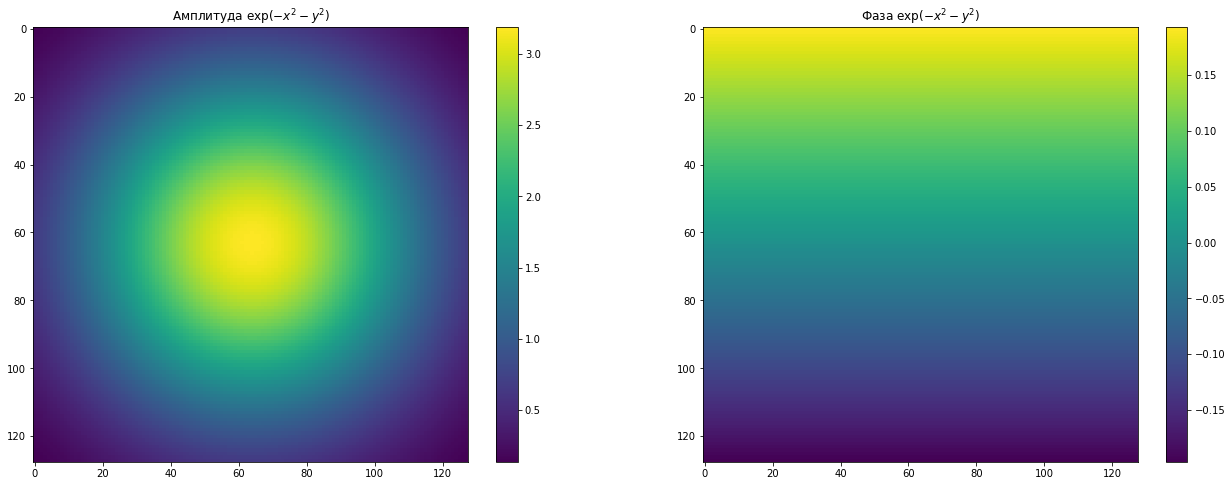

In [20]:
lspace = np.linspace(-a, a, num=N, endpoint=False)

X, Y = np.meshgrid(lspace, lspace)

gaussian_beam_2d = gen_gaussian_beam_2d(X, Y).astype(np.complex)

fft_gaussian_beam_2d, domain = finite_fft_2d(gaussian_beam_2d, a=-a, b=a, N=N, M=M)

# - - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -

fig = plt.figure(figsize=(22, 8))

ax = fig.add_subplot(121)
plt.imshow(np.absolute(fft_gaussian_beam_2d))
plt.title(r"Амплитуда $\exp(-x^2 -y^2)$")
plt.colorbar()

ax = fig.add_subplot(122)
plt.imshow(np.angle(fft_gaussian_beam_2d))
plt.title(r"Фаза $\exp(-x^2 -y^2)$")
plt.colorbar()

plt.show()

## 3. Световое поле

In [21]:
def gen_light_field_2d(x, y):
    return x ** 2 * y ** 2

#### Исходное поле

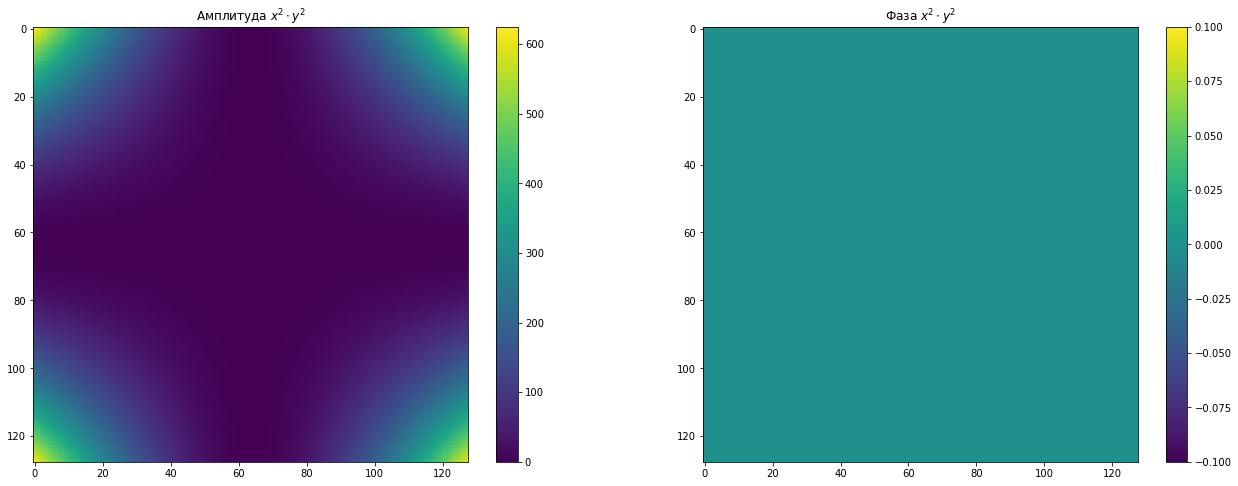

In [22]:
lspace = np.linspace(-a, a, num=N, endpoint=False)

X, Y = np.meshgrid(lspace, lspace)

light_field_2d = gen_light_field_2d(X, Y).astype(np.complex)

# - - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -

fig = plt.figure(figsize=(22, 8))

ax = fig.add_subplot(121)
plt.imshow(np.absolute(light_field_2d))
plt.title(r"Амплитуда $x^2 \cdot y ^ 2$")
plt.colorbar()

ax = fig.add_subplot(122)
plt.imshow(np.angle(light_field_2d))
plt.title(r"Фаза $x^2 \cdot y ^ 2$")
plt.colorbar()

plt.show()

#### Преобразование

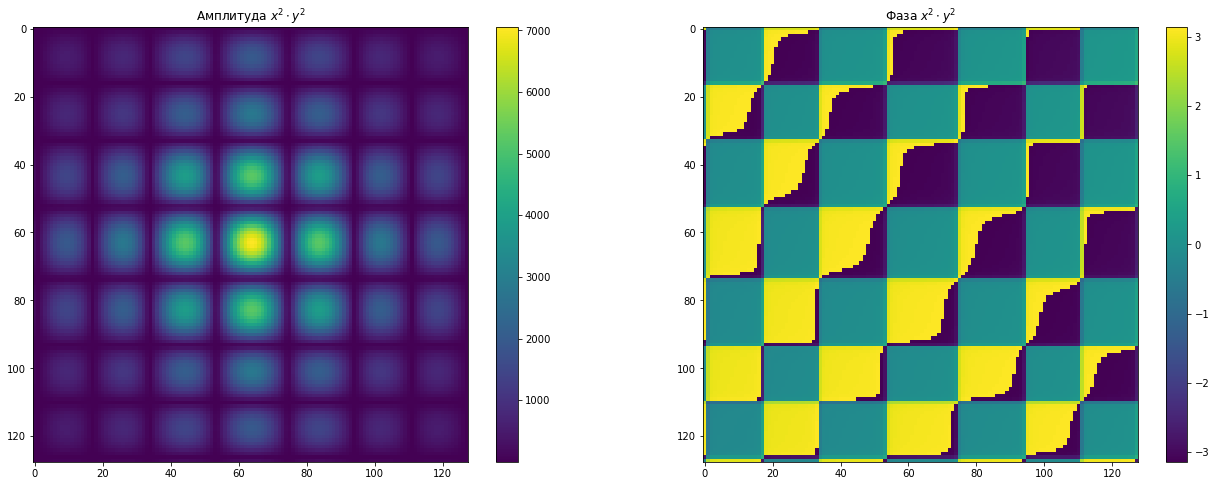

In [23]:
fft_gaussian_beam_2d, domain = finite_fft_2d(light_field_2d, a=-a, b=a, N=N, M=M)

fig = plt.figure(figsize=(22, 8))

ax = fig.add_subplot(121)
plt.imshow(np.absolute(fft_gaussian_beam_2d))
plt.title(r"Амплитуда $x^2 \cdot y ^ 2$")
plt.colorbar()

ax = fig.add_subplot(122)
plt.imshow(np.angle(fft_gaussian_beam_2d))
plt.title(r"Фаза $x^2 \cdot y ^ 2$")
plt.colorbar()

plt.show()

## 4. Аналитический результат преобразования

In [24]:
_x = sympy.Symbol("x")
_y = sympy.Symbol("y")
_u = sympy.Symbol("u")
_v = sympy.Symbol("v")
_a = sympy.Symbol("a")

#### Вычисление повторного интеграла: интегрирование по dx

In [25]:
integrate_dx = sympy.integrate(gen_light_field_2d(_x, _y) * sympy.exp(-2 * sympy.pi * 1j * (_u * _x + _v * _y)), (_x, -_a, _a)).subs(_a, a)

#### Интегрирование по dy

In [26]:
integrate_dy = sympy.integrate(integrate_dx.args[0][0], (_y, -_a, _a)).simplify()

#### Аналитическое решение в общем виде

In [27]:
integrate_dy

Piecewise((((-6.25*pi**4*a**2*u**2*v**2*exp(20.0*I*pi*u) + 6.25*pi**4*a**2*u**2*v**2*exp(40.0*I*pi*u) + 1.25*I*pi**3*a**2*u*v**2*exp(20.0*I*pi*u) + 1.25*I*pi**3*a**2*u*v**2*exp(40.0*I*pi*u) + 0.125*pi**2*a**2*v**2*exp(20.0*I*pi*u) - 0.125*pi**2*a**2*v**2*exp(40.0*I*pi*u) + 6.25*I*pi**3*a*u**2*v*exp(20.0*I*pi*u) - 6.25*I*pi**3*a*u**2*v*exp(40.0*I*pi*u) + 1.25*pi**2*a*u*v*exp(20.0*I*pi*u) + 1.25*pi**2*a*u*v*exp(40.0*I*pi*u) - 0.125*I*pi*a*v*exp(20.0*I*pi*u) + 0.125*I*pi*a*v*exp(40.0*I*pi*u) + 3.125*pi**2*u**2*exp(20.0*I*pi*u) - 3.125*pi**2*u**2*exp(40.0*I*pi*u) - 0.625*I*pi*u*exp(20.0*I*pi*u) - 0.625*I*pi*u*exp(40.0*I*pi*u) - 0.0625*exp(20.0*I*pi*u) + 0.0625*exp(40.0*I*pi*u))*exp(30.0*I*pi*u) + (6.25*pi**4*a**2*u**2*v**2*exp(20.0*I*pi*u) - 6.25*pi**4*a**2*u**2*v**2*exp(40.0*I*pi*u) - 1.25*I*pi**3*a**2*u*v**2*exp(20.0*I*pi*u) - 1.25*I*pi**3*a**2*u*v**2*exp(40.0*I*pi*u) - 0.125*pi**2*a**2*v**2*exp(20.0*I*pi*u) + 0.125*pi**2*a**2*v**2*exp(40.0*I*pi*u) + 6.25*I*pi**3*a*u**2*v*exp(20.0*I*pi*u

#### Аналитическое решение после подстановки $a$

In [28]:
integrate_dy.subs(_a, a)

Piecewise((((-156.25*pi**4*u**2*v**2*exp(20.0*I*pi*u) + 156.25*pi**4*u**2*v**2*exp(40.0*I*pi*u) + 31.25*I*pi**3*u**2*v*exp(20.0*I*pi*u) - 31.25*I*pi**3*u**2*v*exp(40.0*I*pi*u) + 3.125*pi**2*u**2*exp(20.0*I*pi*u) - 3.125*pi**2*u**2*exp(40.0*I*pi*u) + 31.25*I*pi**3*u*v**2*exp(20.0*I*pi*u) + 31.25*I*pi**3*u*v**2*exp(40.0*I*pi*u) + 6.25*pi**2*u*v*exp(20.0*I*pi*u) + 6.25*pi**2*u*v*exp(40.0*I*pi*u) - 0.625*I*pi*u*exp(20.0*I*pi*u) - 0.625*I*pi*u*exp(40.0*I*pi*u) + 3.125*pi**2*v**2*exp(20.0*I*pi*u) - 3.125*pi**2*v**2*exp(40.0*I*pi*u) - 0.625*I*pi*v*exp(20.0*I*pi*u) + 0.625*I*pi*v*exp(40.0*I*pi*u) - 0.0625*exp(20.0*I*pi*u) + 0.0625*exp(40.0*I*pi*u))*exp(30.0*I*pi*u) + (156.25*pi**4*u**2*v**2*exp(20.0*I*pi*u) - 156.25*pi**4*u**2*v**2*exp(40.0*I*pi*u) + 31.25*I*pi**3*u**2*v*exp(20.0*I*pi*u) - 31.25*I*pi**3*u**2*v*exp(40.0*I*pi*u) - 3.125*pi**2*u**2*exp(20.0*I*pi*u) + 3.125*pi**2*u**2*exp(40.0*I*pi*u) - 31.25*I*pi**3*u*v**2*exp(20.0*I*pi*u) - 31.25*I*pi**3*u*v**2*exp(40.0*I*pi*u) + 6.25*pi**2*u*v*

In [29]:
analytical_function_2d = sympy.lambdify([_u, _v], integrate_dy.subs(_a, a).args[0][0], "numpy")

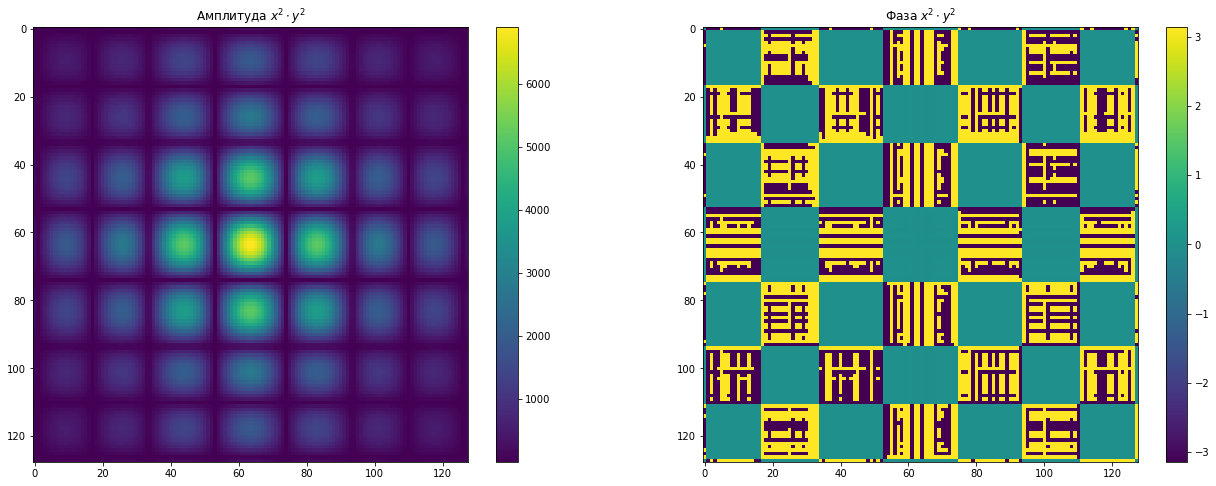

In [30]:
fft_gaussian_beam_2d, domain = finite_fft_2d(light_field_2d, a=-a, b=a, N=N, M=M)

# - - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -

lspace = np.linspace(domain[0], domain[1], num=N)

X, Y = np.meshgrid(lspace, lspace)

# Unused analytical function.
# analytical_result_2d = analytical_function_2d(X, Y)

analytical_result_2d = analytical_function(X) * analytical_function(Y)

fig = plt.figure(figsize=(22, 8))

ax = fig.add_subplot(121)
plt.imshow(np.absolute(analytical_result_2d))
plt.title(r"Амплитуда $x^2 \cdot y ^ 2$")
plt.colorbar()

ax = fig.add_subplot(122)
plt.imshow(np.angle(analytical_result_2d))
plt.title(r"Фаза $x^2 \cdot y ^ 2$")
plt.colorbar()

plt.show()